# Key Research Question

What are the trends of positive and negative sentiment in the context of Tourism attraction reviews and how do these trends align with rising/falling COVID-19 case numbers? (i.e. is negative sentiment correlated with higher case numbers?)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn import model_selection
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
import scipy.stats
from scipy.stats import pearsonr

%matplotlib inline


filename = r"C:\Users\Test\Downloads\TourismSentimentData\covidsentimentforpython.csv"
data = read_csv(filename)


**Here we examine our data set, which includes the nubmers for positive and negatvie review counts as well as the numberr of new Covid cases and the proportion of positive versus negative sentiment for each day over the two year span (09/2019-09/2021)**

In [2]:
print(data)

          days  positive  negative  New Cases  proportion pos  proportion neg  \
0    9/17/2019       449       440          0        0.505062        0.494938   
1    9/18/2019       467       686          0        0.405030        0.594970   
2    9/19/2019       471       535          0        0.468191        0.531809   
3    9/20/2019       468       635          0        0.424297        0.575703   
4    9/21/2019       296       305          0        0.492512        0.507488   
..         ...       ...       ...        ...             ...             ...   
724  9/10/2021       377      1119     163027        0.252005        0.747995   
725  9/11/2021       272       479     141808        0.362184        0.637816   
726  9/12/2021       403       431     111492        0.483213        0.516787   
727  9/13/2021       390       480     120967        0.448276        0.551724   
728  9/14/2021       540       527     141644        0.506092        0.493908   

     percent Change cases  

**Cleaning and adjusting/scaling the data**

In [3]:
pos = data[['positive']]
neg = data[['negative']]
cases = data[['New Cases']]
data['days'] = pd.to_datetime(data['days'])
dates = data[['days']]
proportionpos = data[['proportion pos']]
proportionneg = data[['proportion neg']]

In [4]:
scaler = MinMaxScaler()
scaledpos = scaler.fit_transform(pos)

In [5]:
scaledneg = scaler.fit_transform(neg)

In [6]:
scaledcases = scaler.fit_transform(cases)

In [7]:
scaledproportionpos = scaler.fit_transform(proportionpos)

In [8]:
scaledproportionneg = scaler.fit_transform(proportionneg)

**Correlation testing for eahc of the variables, looking for a p-value below 0.05 for significance**

In [9]:
pearson, pvalue = pearsonr(np.squeeze(neg), np.squeeze(cases))

In [10]:
print(pearson)

-0.12486466431089563


In [11]:
print(pvalue)

0.0007280497591072079


**With a value below 0.05, we can see that there is a statistrically significant correlation between negative sentiment and the number of new covid cases; we can now plot the variables to assess**

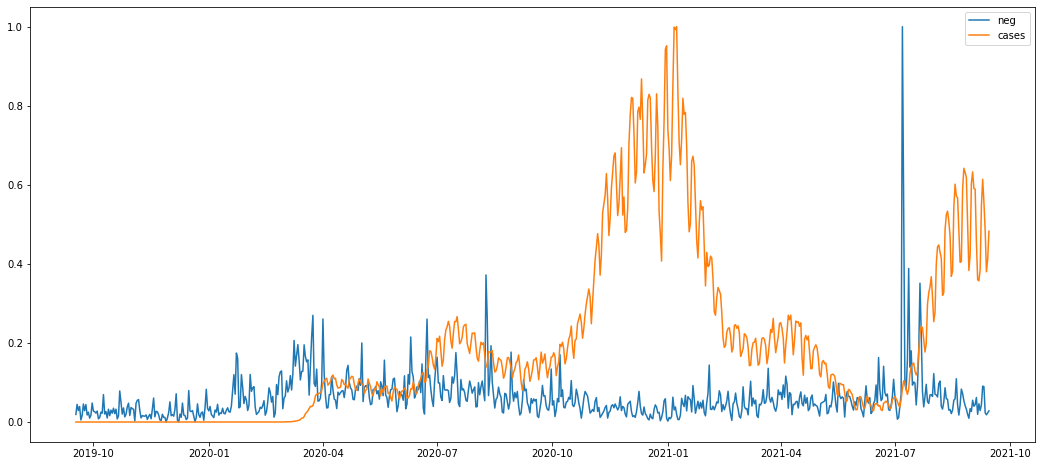

In [12]:
plt.figure(figsize=(18,8))
plt.plot(dates,scaledneg, label = "neg")
plt.plot(dates, scaledcases, label = "cases")
plt.legend()
plt.show()

**Interestingly, the peak of negative sentiment is actually at the lowest point of cases, followed by a sharp increase in new cases. We attribute this to a possible lag affect for the impacts of diagnosed cases (and the two week quarantine to follow diagnosis) or possibly to the FDA approval of several vaccines around the date the highest negative sentiment was seen: https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine ; there were also reports of adverse reactions to the Johnson & Johnson vaccine around this date as well: https://www.cdc.gov/mmwr/volumes/70/wr/mm7032e4.htm . 

In [13]:
pearson, pvalue = pearsonr(np.squeeze(pos), np.squeeze(cases))

In [14]:
print(pearson)

-0.18137213984254336


In [15]:
print(pvalue)

8.240418781759282e-07


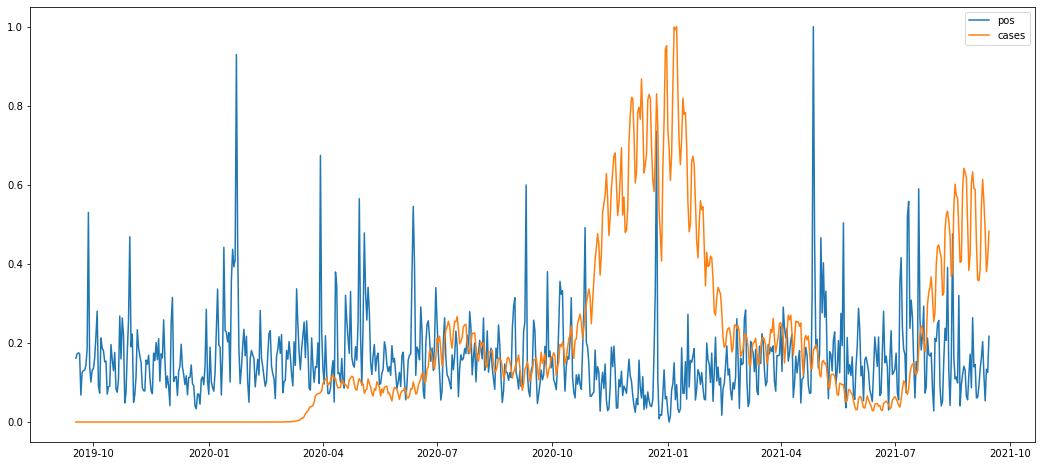

In [16]:
plt.figure(figsize=(18,8))
plt.plot(dates,scaledpos, label = "pos")
plt.plot(dates, scaledcases, label = "cases")
plt.legend()
plt.show()

In [17]:
pearson, pvalue = pearsonr(np.squeeze(proportionpos), np.squeeze(cases))

In [18]:
print(pearson)

-0.042159999190851935


In [19]:
print(pvalue)

0.25559176012801493


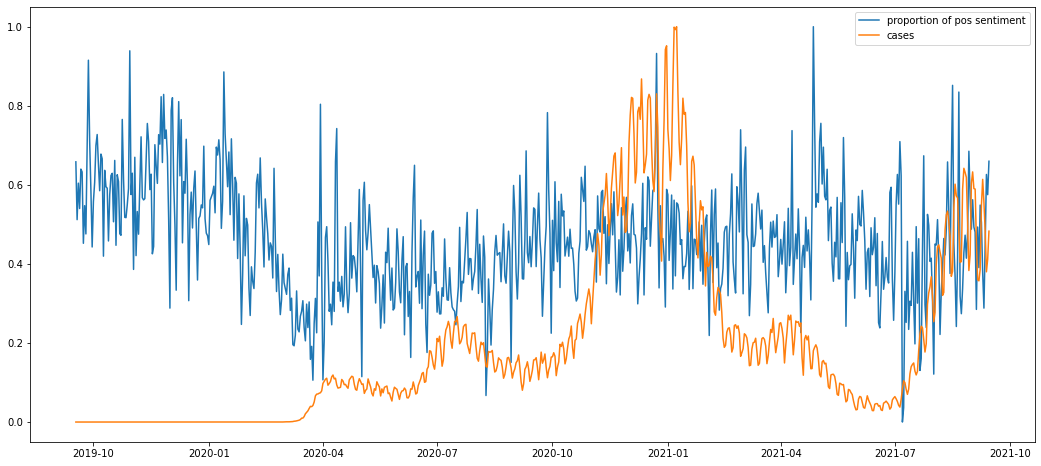

In [20]:
plt.figure(figsize=(18,8))
plt.plot(dates,scaledproportionpos, label = "proportion of pos sentiment")
plt.plot(dates, scaledcases, label = "cases")
plt.legend()
plt.show()

In [22]:
pearson, pvalue = pearsonr(np.squeeze(proportionneg), np.squeeze(cases))

In [23]:
print(pearson)

0.042159999190851935


In [24]:
print(pvalue)

0.25559176012801493


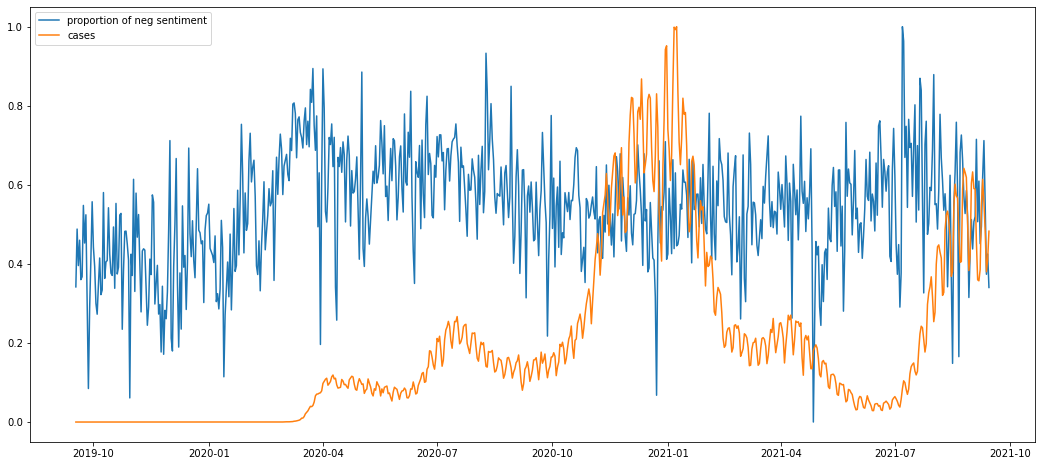

In [21]:
plt.figure(figsize=(18,8))
plt.plot(dates,scaledproportionneg, label = "proportion of neg sentiment")
plt.plot(dates, scaledcases, label = "cases")
plt.legend()
plt.show()

**As indicated by the p-values of the proportional sentiment and positive sentiment; there is no indicated correlation between new cases and the proportion of positive vs negative sentiment, negatvie vs positive sentiment; or increases in positive sentiment. However, there is a significant relationship between increased negative sentiment and new cases. As discussed above, this could be a lagged reaction to spikes in cases and quarantines following infection diagnosis; or negative reaction to the approval of several vaccines and vaccine mandates at tourism attractions.**

**Results**

Pearson Pos, New Cases: -0.18137213984254336
p-value: 8.240418781759282e-07

**Pearson Neg, New Cases: -0.12486466431089563**
**p-value: 0.0007280497591072079**

Pearson Proportion Pos, New Cases: -0.042159999190851935
p-value: 0.25559176012801493

Pearson Proportion Neg, New Cases: 0.042159999190851935
p-value: 0.25559176012801493